# practical example for perceptron

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
speed_data = pd.read_csv("speed_decision_data.csv")

In [4]:
speed_data.head()

,1 - Distance From Bump,Height of Bump,Speed
0,0.575374,0.680337,0
1,0.376002,0.278661,1
2,0.973890,0.741585,0
3,0.310378,0.342374,1
4,0.109521,0.268304,1


<Axes: xlabel='1 - Distance From Bump', ylabel='Height of Bump'>

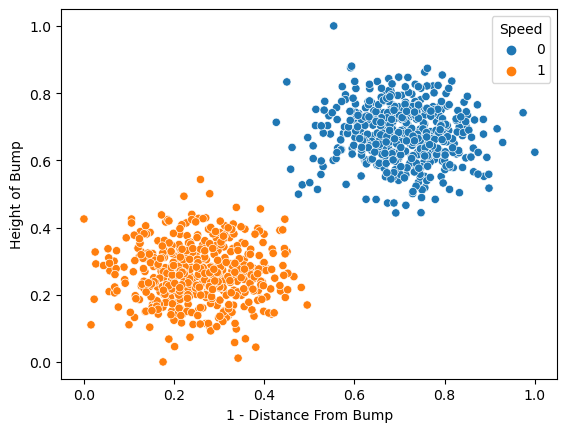

In [7]:
sns.scatterplot(data= speed_data, x='1 - Distance From Bump', y='Height of Bump', hue = 'Speed')

In [8]:
X_train = speed_data[['1 - Distance From Bump', 'Height of Bump']]

In [9]:
y_train = speed_data['Speed']

In [11]:
model = Sequential()

In [15]:
model.add(Dense(1, input_dim=2, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(X_train,y_train,epochs=100,verbose=2)

Epoch 1/100
32/32 - 1s - loss: 0.7012 - 1s/epoch - 35ms/step
Epoch 2/100
32/32 - 0s - loss: 0.6994 - 69ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 0.6979 - 64ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6966 - 54ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.6956 - 58ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.6948 - 60ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.6943 - 65ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.6938 - 61ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.6935 - 59ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.6932 - 73ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.6929 - 72ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.6927 - 80ms/epoch - 3ms/step
Epoch 13/100
32/32 - 0s - loss: 0.6926 - 81ms/epoch - 3ms/step
Epoch 14/100
32/32 - 0s - loss: 0.6924 - 85ms/epoch - 3ms/step
Epoch 15/100
32/32 - 0s - loss: 0.6923 - 79ms/epoch - 2ms/step
Epoch 16/100
32/32 - 0s - loss: 0.6922 - 70ms/epoch - 2ms/step
Ep

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
y_train_predict = (model.predict(X_train) > 0.5).astype("int32")


32/32 [==============================] - 0s 2ms/step


In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_train, y_train_predict)

<Axes: >

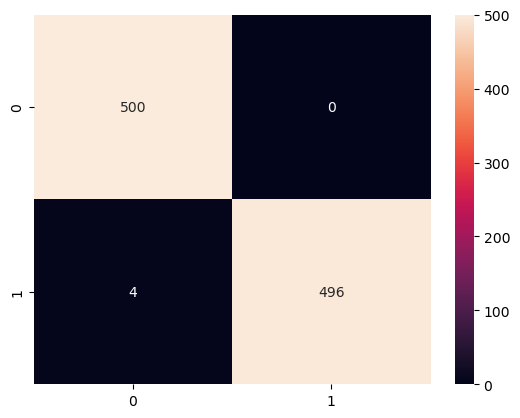

In [22]:
sns.heatmap(cm, annot=True, fmt="d")

## visualize the training set results

In [24]:
from matplotlib.colors import ListedColormap

In [26]:
X_grid, y_grid = X_train.values, y_train.values

In [27]:
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min(), stop = X_grid[:,0].max(), step = 0.01),
                    np.arange(start = X_grid[:, 1].min(), stop = X_grid[:,1].max(), step = 0.01))


313/313 [==============================] - 0s 1ms/step


C:\Users\Amit Gali\AppData\Local\Temp\ipykernel_3300\2958114998.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


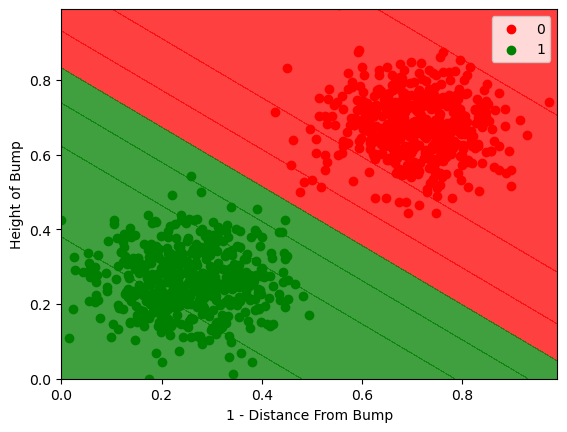

In [32]:
plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha= 0.75, cmap = ListedColormap(("red","green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
               c = ListedColormap(("red","green"))(i), label = j)
    
plt.xlabel("1 - Distance From Bump")
plt.ylabel("Height of Bump")
plt.legend()
plt.show()

In [33]:
weights, baises = model.layers[0].get_weights()

In [34]:
weights

array([[2.9924212],
       [3.7741275]], dtype=float32)

In [35]:
baises

array([-3.0623631], dtype=float32)

In [36]:
weights, baises = model.layers[1].get_weights()

In [37]:
weights

array([[-4.286326]], dtype=float32)

In [38]:
baises

array([1.6777774], dtype=float32)

In [39]:
weights, baises = model.layers[2].get_weights()

In [40]:
weights

array([[-4.4691777]], dtype=float32)

In [41]:
baises

array([1.1899375], dtype=float32)